In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_csv('./datasets/car.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [8]:
label_encoder = LabelEncoder()
df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])
df['Selling_type'] = label_encoder.fit_transform(df['Selling_type'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])


In [9]:
X = df[['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']]
Y = df['Selling_Price']


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [11]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, Y_train)

dt_pred = dt_model.predict(X_test)

dt_rmse = np.sqrt(mean_squared_error(Y_test, dt_pred))
dt_r2 = r2_score(Y_test, dt_pred)
print(f"Decision Tree RMSE: {dt_rmse}")
print(f"Decision Tree R2 Score: {dt_r2}")


Decision Tree RMSE: 1.1188460097093893
Decision Tree R2 Score: 0.945657276795386


In [12]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

rf_pred = rf_model.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(Y_test, rf_pred))
rf_r2 = r2_score(Y_test, rf_pred)
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest R2 Score: {rf_r2}")


Random Forest RMSE: 0.9226190910734038
Random Forest R2 Score: 0.9630473458807466


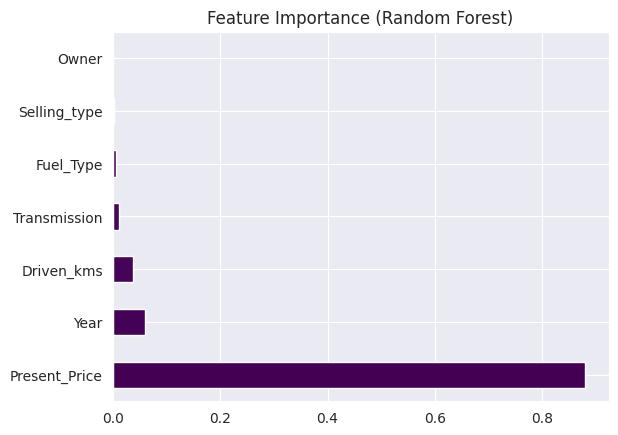

In [30]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh',color=plt.cm.viridis(range(len(top_features))))
plt.title('Feature Importance (Random Forest)')
plt.show()

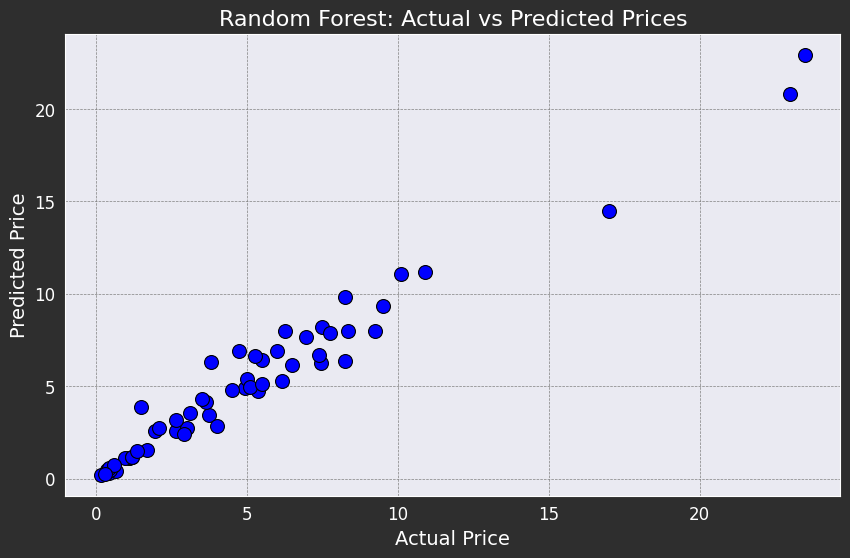

In [22]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_test, y=rf_pred, color='blue', edgecolor='black', s=100)

plt.xlabel('Actual Price', fontsize=14, color='white')
plt.ylabel('Predicted Price', fontsize=14, color='white')
plt.title('Random Forest: Actual vs Predicted Prices', fontsize=16, color='white')
plt.gcf().set_facecolor('#2E2E2E')
plt.tick_params(axis='both', which='major', labelsize=12, colors='white')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

plt.show()


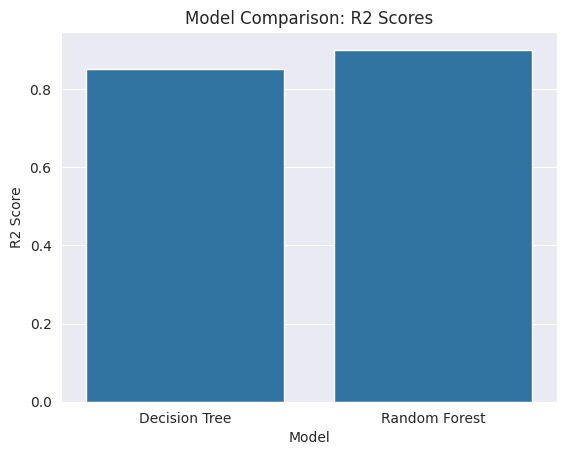

<ipython-input-21-d6afa048cbe3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=model_comparison,palette="Reds_d")


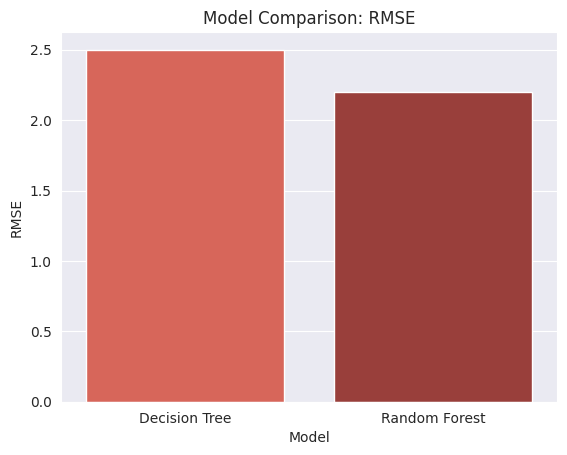

In [21]:
models = ['Decision Tree', 'Random Forest']
r2_scores = [dt_r2, rf_r2]
rmse_scores = [dt_rmse, rf_rmse]
model_comparison = pd.DataFrame({'Model': models, 'R2 Score': r2_scores, 'RMSE': rmse_scores})
sns.barplot(x='Model', y='R2 Score', data=model_comparison)
plt.title('Model Comparison: R2 Scores')
plt.show()

sns.barplot(x='Model', y='RMSE', data=model_comparison,palette="Reds_d")
plt.title('Model Comparison: RMSE')
plt.show()
